In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
tf.random.set_seed(42)

from sklearn.utils import resample
from matplotlib import rcParams

In [23]:
df = pd.read_csv('train.csv')

In [24]:
enc = LabelEncoder()

In [25]:
smoking_status = enc.fit_transform(df.smoking_status)

In [26]:
gender = enc.fit_transform(df.gender)

In [27]:
ever_married = enc.fit_transform(df.ever_married)

In [28]:
work_type = enc.fit_transform(df.work_type)

In [29]:
Residence_type = enc.fit_transform(df.Residence_type)

In [30]:
df.smoking_status = smoking_status
df.gender = gender
df.ever_married  = ever_married
df.work_type =  work_type
df.Residence_type = Residence_type

In [32]:
test = pd.read_csv('test.csv')

In [33]:
test.smoking_status = enc.fit_transform(test.smoking_status)
test.gender = enc.fit_transform(test.gender)
test.ever_married  = enc.fit_transform(test.ever_married)
test.work_type =  enc.fit_transform(test.work_type)
test.Residence_type = enc.fit_transform(test.Residence_type)

# Tensorflow

In [149]:
model = None
history = None

In [150]:
def tensorflow_train(data,ep=10):
    
    global model,history
    
    X = data.drop(['id','stroke'], axis=1)
    y = data['stroke']
    
    X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
        ]
    )

    history = model.fit(X_train_scaled, y_train, epochs=ep)

In [35]:
X = df.drop(['id','stroke'], axis=1)
y = df['stroke']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_test_scaled

array([[-0.78405704, -0.71457576, -0.22720791, ..., -0.163209  ,
         0.04697846, -1.31900767],
       [-0.78405704,  0.45039003, -0.22720791, ...,  0.050139  ,
         0.50456311,  0.57193038],
       [-0.78405704,  0.35719277, -0.22720791, ..., -0.29507539,
         0.16506482,  0.57193038],
       ...,
       [-0.78405704,  0.17079824, -0.22720791, ..., -0.1517937 ,
        -0.73534367, -1.31900767],
       [-0.78405704, -1.87581366, -0.22720791, ..., -0.45213415,
        -2.03429363, -1.31900767],
       [ 1.2754174 , -0.10879355, -0.22720791, ...,  5.26850517,
         2.3201409 ,  0.57193038]])

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
383/383 [==============================] - 3s 4ms/step - loss: 0.1859 - accuracy: 0.9585 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1437 - accuracy: 0.9587 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1795 - accuracy: 0.9583 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1675 - accuracy: 0.9578 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9588 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1788 - accuracy: 0.9586 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
383/383 [==============================] - 1s 4ms/step - loss: 0.1721 - accuracy: 0.9589 - precision: 0.0000e+00 - reca

In [45]:
df['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

## Ensambling Impalanced Data Set

In [93]:
from sklearn.utils import resample

In [94]:
# Separate majority and minority classes
df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]

In [95]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14672,    # to match majority class
                                 random_state=123) # reproducible results

In [96]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [97]:
df_upsampled.stroke.value_counts()

0    14672
1    14672
Name: stroke, dtype: int64

# Model 1

In [151]:
tensorflow_train(df_upsampled,60)

Epoch 1/100


C:\Users\ali\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


734/734 [==============================] - 5s 4ms/step - loss: 0.4521 - accuracy: 0.8028 - precision: 0.7721 - recall: 0.8601
Epoch 2/100
734/734 [==============================] - 3s 4ms/step - loss: 0.4096 - accuracy: 0.8157 - precision: 0.7945 - recall: 0.8524
Epoch 3/100
734/734 [==============================] - 3s 4ms/step - loss: 0.4646 - accuracy: 0.8028 - precision: 0.7665 - recall: 0.8715
Epoch 4/100
734/734 [==============================] - 3s 4ms/step - loss: 0.4480 - accuracy: 0.7940 - precision: 0.7705 - recall: 0.8384
Epoch 5/100
734/734 [==============================] - 3s 4ms/step - loss: 0.4182 - accuracy: 0.8020 - precision: 0.7769 - recall: 0.8481
Epoch 6/100
734/734 [==============================] - 3s 4ms/step - loss: 0.3955 - accuracy: 0.8113 - precision: 0.7723 - recall: 0.8837
Epoch 7/100
734/734 [==============================] - 3s 4ms/step - loss: 0.3857 - accuracy: 0.8206 - precision: 0.7909 - recall: 0.8725
Epoch 8/100
734/734 [=========================

734/734 [==============================] - 3s 3ms/step - loss: 0.3026 - accuracy: 0.8848 - precision: 0.8251 - recall: 0.9769
Epoch 61/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2922 - accuracy: 0.8904 - precision: 0.8305 - recall: 0.9814
Epoch 62/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2921 - accuracy: 0.8904 - precision: 0.8291 - recall: 0.9838
Epoch 63/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2862 - accuracy: 0.8925 - precision: 0.8326 - recall: 0.9829
Epoch 64/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2890 - accuracy: 0.8919 - precision: 0.8311 - recall: 0.9842
Epoch 65/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2939 - accuracy: 0.8895 - precision: 0.8282 - recall: 0.9832
Epoch 66/100
734/734 [==============================] - 3s 4ms/step - loss: 0.2945 - accuracy: 0.8905 - precision: 0.8293 - recall: 0.9838
Epoch 67/100
734/734 [==================

In [153]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [162]:
def accuracy(history,epoch):
    plt.plot(
        np.arange(1, epoch+1), 
        history.history['loss'], label='Loss'
    )
    plt.plot(
        np.arange(1, epoch+1), 
        history.history['accuracy'], label='Accuracy'
    )
    plt.plot(
        np.arange(1, epoch+1), 
        history.history['precision'], label='Precision'
    )
    plt.plot(
        np.arange(1, epoch+1), 
        history.history['recall'], label='Recall'
    )
    plt.title('Evaluation metrics', size=20)
    plt.xlabel('Epoch', size=14)
    plt.legend();
    

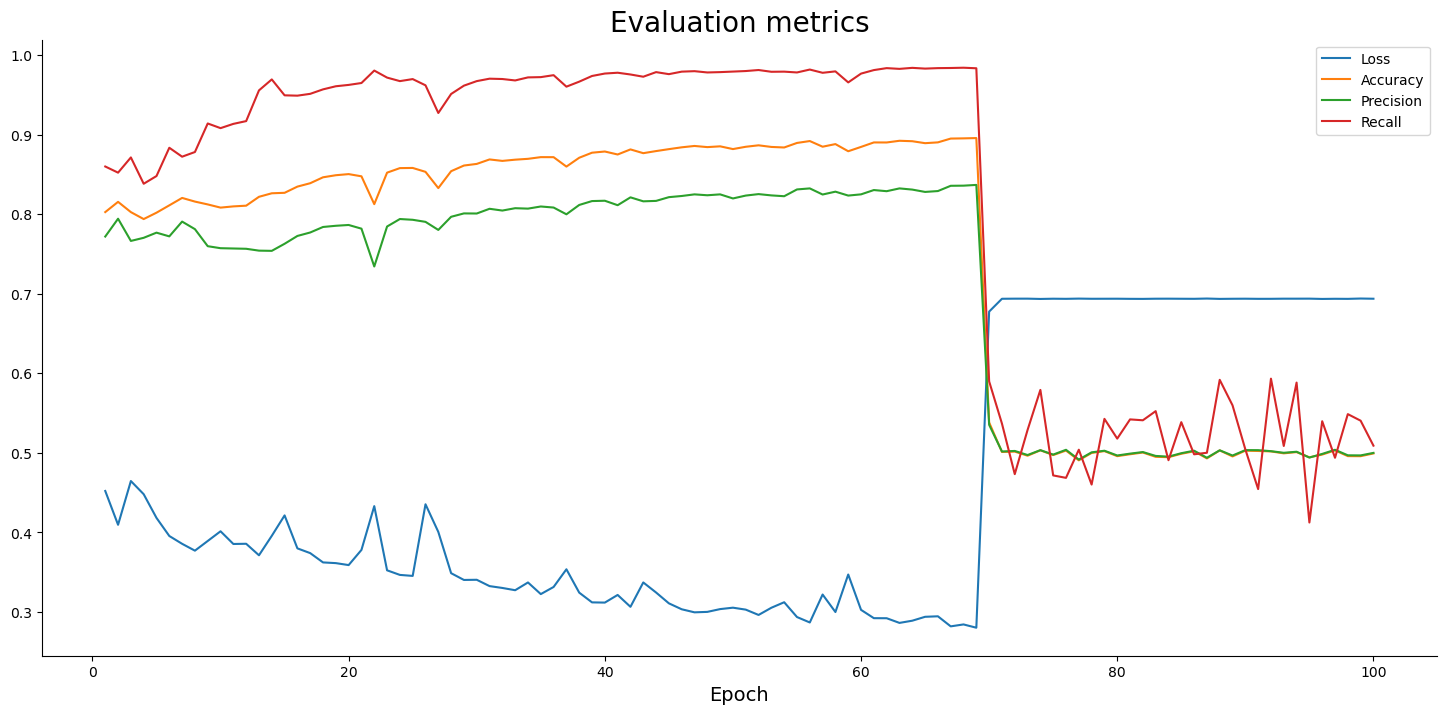

In [154]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [158]:
model_1 = model
history_1 = history

# Model 2

In [159]:
tensorflow_train(df_upsampled,60)

Epoch 1/60


C:\Users\ali\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


734/734 [==============================] - 5s 4ms/step - loss: 0.4452 - accuracy: 0.8034 - precision: 0.7726 - recall: 0.8606
Epoch 2/60
734/734 [==============================] - 3s 4ms/step - loss: 0.4115 - accuracy: 0.8149 - precision: 0.7852 - recall: 0.8676
Epoch 3/60
734/734 [==============================] - 3s 4ms/step - loss: 0.3953 - accuracy: 0.8202 - precision: 0.7758 - recall: 0.9015
Epoch 4/60
734/734 [==============================] - 3s 4ms/step - loss: 0.4057 - accuracy: 0.8199 - precision: 0.7765 - recall: 0.8991
Epoch 5/60
734/734 [==============================] - 3s 4ms/step - loss: 0.3758 - accuracy: 0.8290 - precision: 0.7826 - recall: 0.9119
Epoch 6/60
734/734 [==============================] - 3s 4ms/step - loss: 0.3714 - accuracy: 0.8349 - precision: 0.7853 - recall: 0.9225
Epoch 7/60
734/734 [==============================] - 3s 4ms/step - loss: 0.3795 - accuracy: 0.8355 - precision: 0.7875 - recall: 0.9197
Epoch 8/60
734/734 [==============================] 

734/734 [==============================] - 3s 4ms/step - loss: 0.2860 - accuracy: 0.8992 - precision: 0.8424 - recall: 0.9825


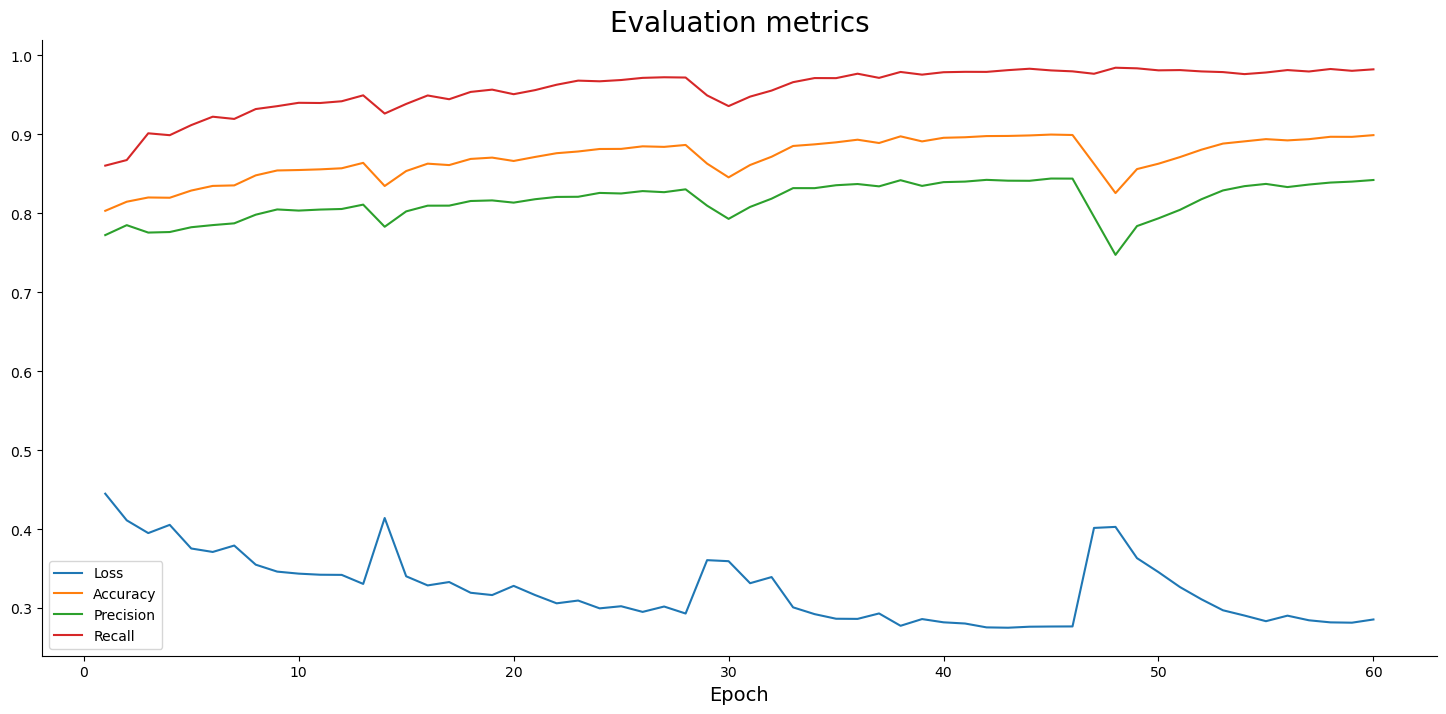

In [163]:
accuracy(history,60)

In [164]:
model_2 = model
history_2 = history

In [167]:
(model_2.predict(X_test_scaled)).min(), (model_2.predict(X_test_scaled)).max()

96/96 [==============================] - 0s 2ms/step


(0.0, 0.85420555)

In [171]:
test.pop('id')

0        15304
1        15305
2        15306
3        15307
4        15308
         ...  
10199    25503
10200    25504
10201    25505
10202    25506
10203    25507
Name: id, Length: 10204, dtype: int64

In [177]:
sub = pd.read_csv('sample_submission.csv')

In [178]:
test_scaled = scaler.transform(test)

In [179]:
pred1 = model.predict(test_scaled)

319/319 [==============================] - 1s 2ms/step


In [181]:
pred1.min(),pred1.max()

(0.0, 0.9885432)

In [182]:
sub['stroke'] = pred1

In [183]:
sub.to_csv('sub8.csv',index=False)

# Down sampling Technique

In [184]:
df.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [188]:
# Separate majority and minority classes
df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=632,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.stroke.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

0    632
1    632
Name: stroke, dtype: int64

In [189]:
tensorflow_train(df_downsampled)

Epoch 1/10


C:\Users\ali\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 2s 4ms/step - loss: 0.7742 - accuracy: 0.7161 - precision: 0.7260 - recall: 0.7162   
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.8091 - precision: 0.7651 - recall: 0.9054
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.8042 - precision: 0.8042 - recall: 0.8166
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8051 - precision: 0.7772 - recall: 0.8687
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8190 - precision: 0.7986 - recall: 0.8649
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.8210 - precision: 0.7910 - recall: 0.8842
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8299 - precision: 0.7952 - recall: 0.8996
Epoch 8/10
32/32 [==============================] - 0s 4ms/step

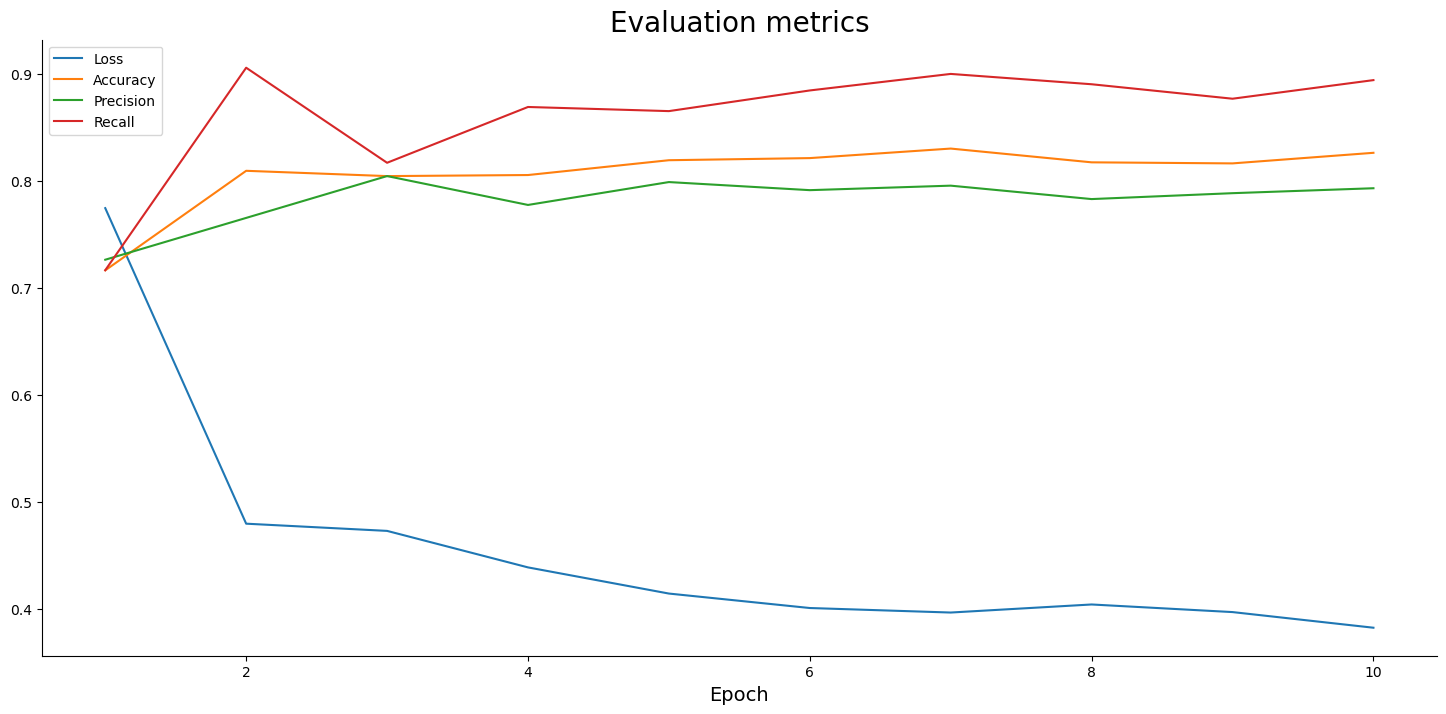

In [191]:
accuracy(history,10)